## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 03</span>

L'obiettivo di questa esercitazione è quello di calcolare i prezzi delle opzioni Plain Vanilla utilizzando la **Teoria di Black-Scholes**.

Utilizzando i seguenti parametri: 
- prezzo dell'asset a $t=0$: $S(0)=100$
- tempo di consgena: $T=1$
- prezzo d'esercizio: $K=100$
- tasso d'interesse a rischio libero: $r=0.1$
- volatilità: $\sigma=0.25$

ho calcolato al tempo $t=0$ via Monte Carlo il prezzo delle opzioni Europee call $C[S(0),0]$ e put $P[S(0),0]$:

1. Campionando **direttamente** il prezzo finale dell'asset $S(T)$ per un **Moto Browniano Geometrico** con $(r,\sigma^2)$
2. Campionando il cammino discretizzato del prezzo dell'asset per un $GBM(r,\sigma^2)$
   dividendo $[0,T]$ in $10^2$ intervalli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data1 = pd.read_csv("Esercizio_03_1/Es03_1C.csv", sep=',')

In [3]:
data2 = pd.read_csv("Esercizio_03_2/Es03_2C.csv", sep=',')

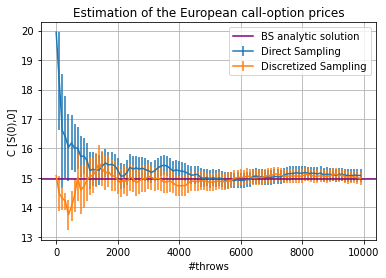

In [4]:
M=10000              # Numero totale di lanci
N=100                 # Numero di blocchi
L=int(M/N)            # Number di lanci in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di lanci = blocco * (Numero di lanci in ogni blocco)
plt.errorbar(x,data1['CumulativeAverage'],yerr=data1['StatisticalUncertainty'], label='Direct Sampling')
plt.errorbar(x,data2['CumulativeAverage'],yerr=data2['StatisticalUncertainty'], label='Discretized Sampling')
plt.axhline(14.97579, color='purple', label='BS analytic solution')
plt.xlabel('#throws')
plt.ylabel('C [S(0),0]')
plt.title('Estimation of the European call-option prices')
plt.grid(True)
plt.legend()
plt.show()

In questo plot ho rappresentato la stima dei prezzi delle opzioni **call** Europee in funzione del numero di "lanci" (tentativi). In blu ho rappresentato l'andamento di questa stima ottenuto campionando direttamente il prezzo finale dell'asset $S(T)$, mentre in arancione ho rappresentato l'andamento ottenuto campionando il cammino discretizzato del prezzo dell'asset dividendo $[0,T]$ in $10^2$ intervalli temporali. E' possibile osservare che entrambi questi andamenti tendono, all'aumentare del numero di lanci, al valore della soluzione analitica di Black-Scholes ( $C [S(0),0]=14.97579$, in viola).

In [5]:
data3 = pd.read_csv("Esercizio_03_1/Es03_1P.csv", sep=',')

In [6]:
data4 = pd.read_csv("Esercizio_03_2/Es03_2P.csv", sep=',')

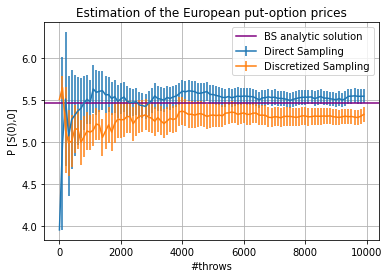

In [7]:
plt.errorbar(x,data3['CumulativeAverage'],yerr=data3['StatisticalUncertainty'], label='Direct Sampling')
plt.errorbar(x,data4['CumulativeAverage'],yerr=data4['StatisticalUncertainty'], label='Discretized Sampling')
plt.axhline(5.45953, color='purple', label='BS analytic solution')
plt.xlabel('#throws')
plt.ylabel('P [S(0),0]')
plt.title('Estimation of the European put-option prices')
plt.grid(True)
plt.legend()
plt.show()

In questo plot ho rappresentato la stima dei prezzi delle opzioni **put** Europee in funzione del numero di "lanci" (tentativi). In blu ho rappresentato l'andamento di questa stima ottenuto campionando direttamente il prezzo finale dell'asset $S(T)$, mentre in arancione ho rappresentato l'andamento ottenuto campionando il cammino discretizzato del prezzo dell'asset dividendo $[0,T]$ in $10^2$ intervalli temporali. E' possibile osservare che entrambi questi andamenti tendono, all'aumentare del numero di lanci, al valore della soluzione analitica di Black-Scholes ( $P [S(0),0]=5.45953$, in viola). 